In [177]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import urllib2
sns.set_style("whitegrid")

# Análise Descritiva

## População em Idade Ativa

Arquivo obtido no IBGE.

http://seriesestatisticas.ibge.gov.br/series.aspx?no=7&op=0&vcodigo=PD156&t=populacao-idade-ativa-pia-sexo

In [149]:
data = pd.read_csv('dados/pia.csv', sep=',')

# transpor a tabela para um ano por linha
data = data[cols].transpose()
tcols = data.iloc[0]
tcols.name = ''
data.columns = tcols
data = data.ix[1:]

# troca o indicador de decimal de , para . e conversão para float
data = data.applymap(lambda x: float(x.replace(',', '.')))

data.head()

,Homens,Mulheres
1992,48.6,51.4
1993,48.6,51.4
1995,48.5,51.5
1996,48.4,51.6
1997,48.5,51.5


In [263]:
data.describe()

,Homens,Mulheres
count,14.000000,14.000000
mean,48.350000,51.650000
std,0.174312,0.174312
min,48.100000,51.400000
25%,48.200000,51.500000
50%,48.350000,51.650000
75%,48.500000,51.800000
max,48.600000,51.900000


# Análise Exploratória

## Dataset Wine

Classificação de vinhos por região a partir de suas características

http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data

In [171]:
raw_wine_data = pd.read_csv('wine.csv', sep=',', header=None)
raw_wine_data.columns = ['region', 'alcohol', 'malic_acid', 'ash', 'alcalinity_ash',
                'magnesium', 'phenols', 'flavanoids', 'nonflavanoid_phenols',
               'proanthocyanins', 'color_intensity', 'hue', 'od280_od315', 'proline']
wine_data = raw_wine_data.copy()
del wine_data['region']
wine_data.head()

,alcohol,malic_acid,ash,alcalinity_ash,magnesium,phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280_od315,proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Matriz de correlação dos atributos

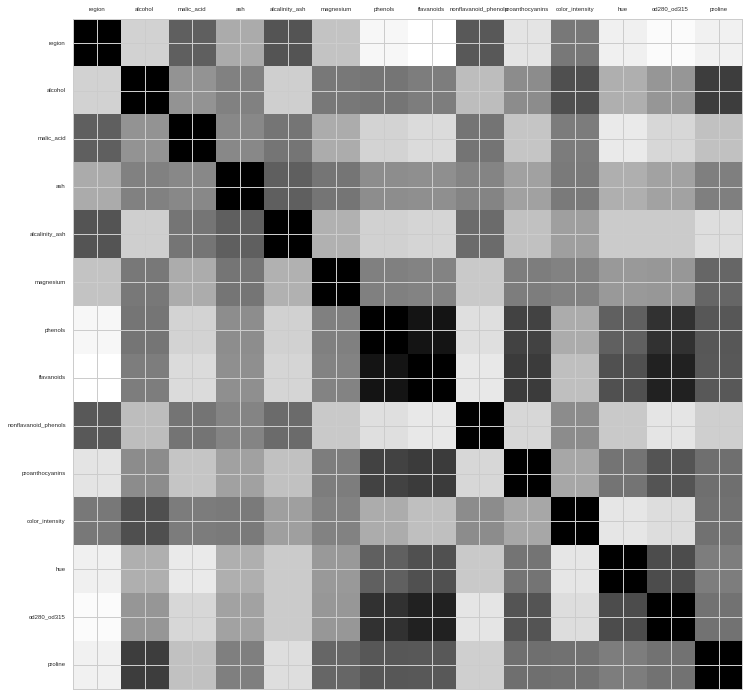

In [170]:
corr = wine_data.corr()
fig, ax = plt.subplots(figsize=(12,12))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns, fontsize=6)
plt.yticks(range(len(corr.columns)), corr.columns, fontsize=6)
plt.show()

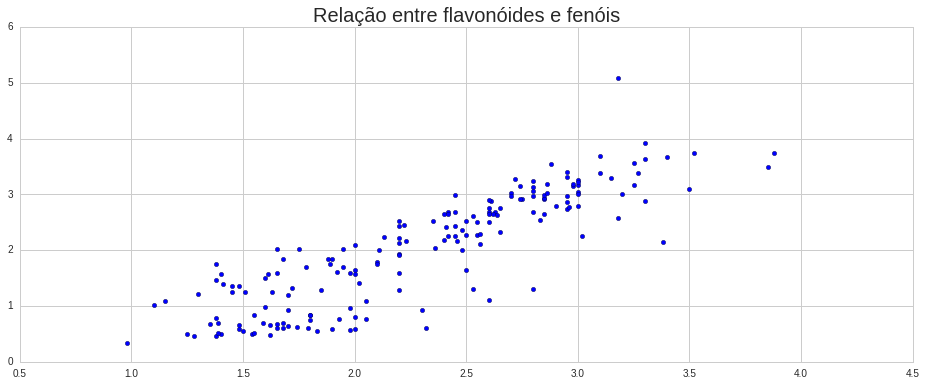

In [165]:
plt.figure(figsize=(16, 6))
plt.title(u'Relação entre flavonóides e fenóis', fontsize=20)
plt.scatter(wine_data['phenols'], wine_data['flavanoids'])
plt.show()

# Análise Inferencial

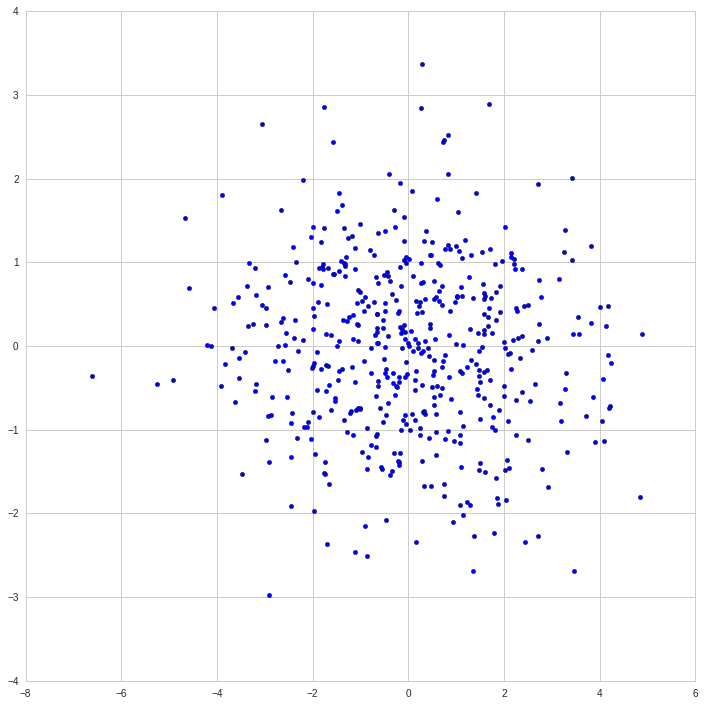

In [161]:
# gerar um dataset sintético a partir de duas gaussianas independentes
x1 = np.random.normal(0, 2, 500)
x2 = np.random.normal(0, 1, 500)
plt.figure(figsize=(12, 12))
plt.scatter(x1, x2)
plt.show()

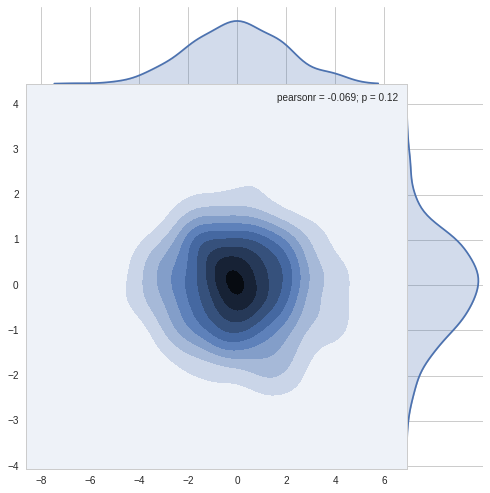

In [167]:
plt.figure(figsize=(12, 12))
sns.jointplot(x1, x2, kind="kde", size=7, space=0)
plt.show()

# Análise Preditiva

Exemplo de redução de dimensionalidade. No caso da análise preditiva queremos aprender quais são as características que dividem os vinhos das duas regiões.

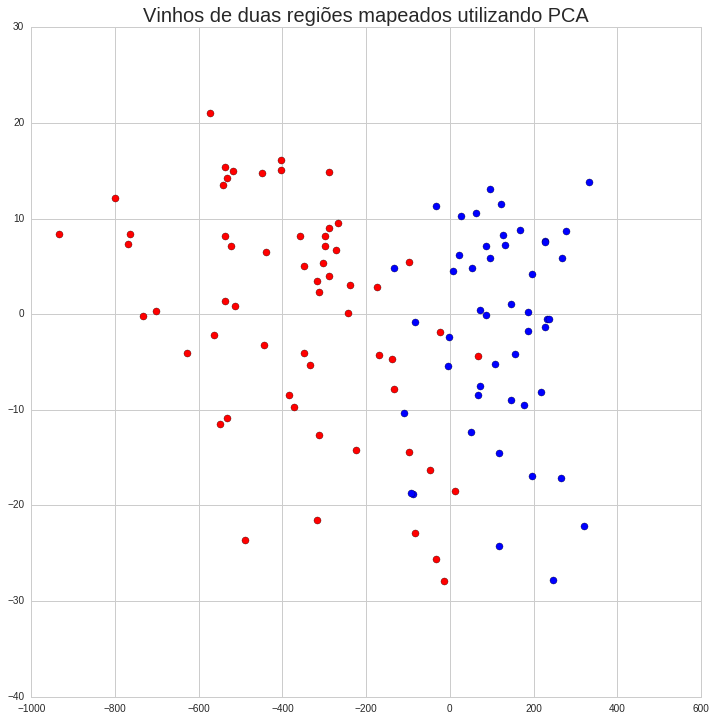

In [261]:
# tecnica para redução de dimensionalidade
from sklearn.decomposition import PCA

X = wine_data.as_matrix()
y = np.array(raw_wine_data['region'])
model = PCA(n_components=2)
np.set_printoptions(suppress=True)
X2 = model.fit_transform(X).T

fig = plt.figure(figsize=(12, 12))
plt.title(u'Vinhos de duas regiões mapeados utilizando PCA', fontsize=20)
ax = fig.add_subplot(111)
for c, i in zip('rb', [1,3]):
    ax.scatter(X2[0][y == i], X2[1][y == i], 50, c=c, label=i)
plt.show()